<a href="https://colab.research.google.com/github/raulbenitez/postgrau_IML_exploratory/blob/master/miniproject1/mpg_marc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Ejercicio mpg

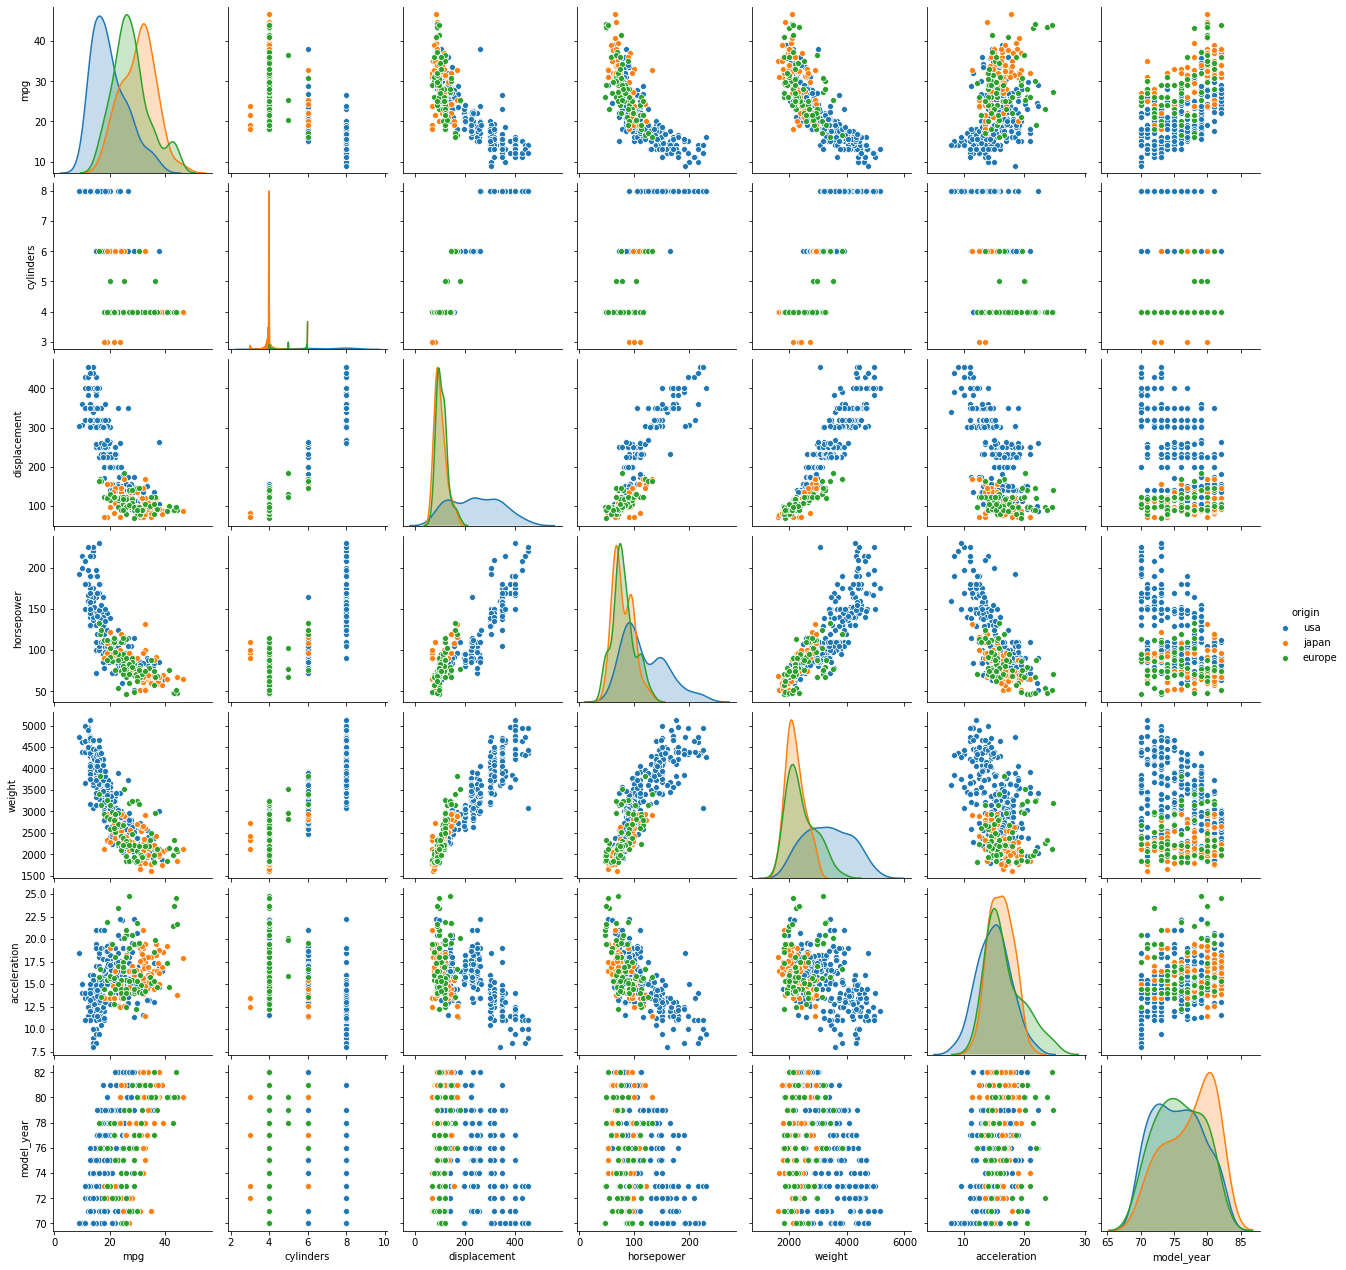

In [3]:
import seaborn as sns; 

mpg = sns.load_dataset("mpg")
mpg.shape
g = sns.pairplot(mpg, hue="origin")

In [4]:
mpg.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model_year', 'origin', 'name'],
      dtype='object')

In [0]:
mpg_no_nan = mpg.dropna()

In [0]:
x = mpg_no_nan[['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model_year']]
y = mpg_no_nan['origin']

In [0]:
from sklearn.preprocessing import StandardScaler
from sklearn import decomposition
from sklearn.decomposition import PCA
XS = StandardScaler().fit_transform(x)

In [0]:
pca = decomposition.PCA(n_components=7).fit(XS)

In [25]:
100*pca.explained_variance_ratio_

array([71.58051179, 12.36559137, 10.4056253 ,  2.62735849,  1.74166177,
        0.7751023 ,  0.50414899])

In [27]:
100*pca.explained_variance_ratio_.cumsum() #indica la cantidad de datos que se explican al hacer la reduccion. en la primera nos da informacion del 70.96% de datos y la segunda el 100%

array([ 71.58051179,  83.94610315,  94.35172845,  96.97908694,
        98.72074871,  99.49585101, 100.        ])

In [0]:
Xproj = pca.transform(XS)

In [0]:
XPCA = Xproj[:,0:3]

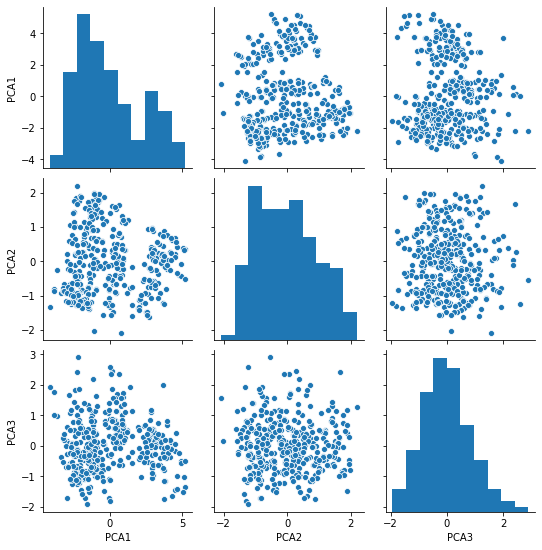

In [41]:
d = pd.DataFrame(XPCA,columns=['PCA1','PCA2','PCA3'])
sns.pairplot(d)
plt.show()

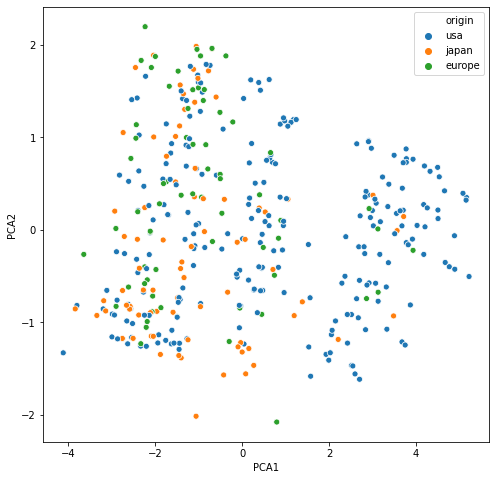

In [45]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt

dfpca = pd.DataFrame(XPCA[:,0:2],columns=['PCA1', 'PCA2'])

fig = plt.figure(figsize=(8,8))

ax = sns.scatterplot(x="PCA1", y="PCA2", hue=y,data=dfpca)
plt.show()